In [32]:
import particles
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from particles import distributions as dists  # where probability distributions are defined
from particles import state_space_models as ssm  # where state-space models are defined

In [7]:
#Definition of the model 

class StochVol(ssm.StateSpaceModel):
    def PX0(self):
        return dists.Normal(loc=self.mu, scale= self.sigma/np.sqrt(1-self.rho**2))
    def PX(self,t , xp):
        #xp stands for previous x 
        return dists.Normal(loc = self.mu + self.rho * ( xp - self.mu),\
                           scale = self.sigma)
    def PY(self, t, xp, x):
        return dists.Normal(loc = 0., scale= np.exp(x))

In [9]:
my_model = StochVol(mu=-1. , rho=.9, sigma=.1)
true_states, data = my_model.simulate(100)

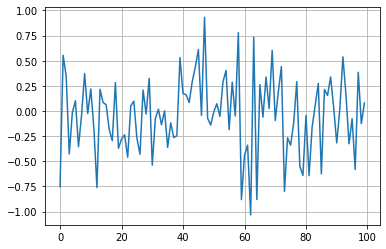

In [12]:
plt.figure()
plt.plot(data)
plt.grid()

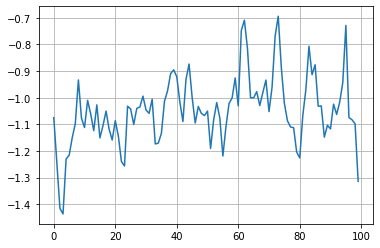

In [13]:
plt.figure()
plt.plot(true_states)
plt.grid()

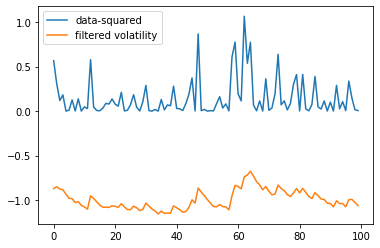

In [30]:


fk_model = ssm.Bootstrap(ssm=my_model, data=data)  # we use the Bootstrap filter
pf = particles.SMC(fk=fk_model, N=100000, resampling='stratified', moments=True, store_history=True)  # the algorithm
pf.run()  # actual computation

# plot
plt.figure()
plt.plot([yt**2 for yt in data], label='data-squared')
plt.plot([m['mean'] for m in pf.summaries.moments], label='filtered volatility')
plt.legend()



/home/remi/anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilbert.py:36: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "hilbert_sort" failed type inference due to: Untyped global name 'invlogit': cannot determine Numba type of <class 'function'>

File "../../../anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilbert.py", line 58:
def hilbert_sort(x):
    <source elided>
        return np.argsort(x, axis=0)
    xs = invlogit((x - np.mean(x, axis=0)) / np.std(x, axis=0))
    ^

  @jit()
/home/remi/anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilbert.py:36: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "hilbert_sort" failed type inference due to: Untyped global name 'invlogit': cannot determine Numba type of <class 'function'>

File "../../../anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilber

/home/remi/anaconda3/envs/Python_projects/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "hilbert_sort" was compiled in object mode without forceobj=True.

File "../../../anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilbert.py", line 37:
@jit()
def hilbert_sort(x):
^

  state.func_ir.loc))
/home/remi/anaconda3/envs/Python_projects/lib/python3.7/site-packages/numba/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "../../../anaconda3/envs/Python_projects/lib/python3.7/site-packages/particles/hilbert.py", line 37:
@jit()
def hilbert_sort(x):
^

  warnings.warn(errors.NumbaDeprecationWarning(msg, state.func_ir.loc))
/home/remi/anaconda3/

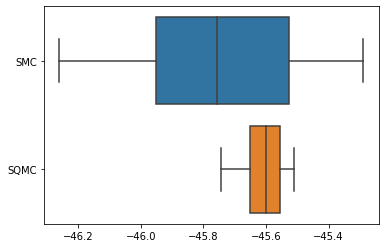

In [33]:
results = particles.multiSMC(fk=fk_model, N=100, nruns=30, qmc={'SMC':False, 'SQMC':True})
plt.figure()
sb.boxplot(x=[r['output'].logLt for r in results], y=[r['qmc'] for r in results])